In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopy
from pathlib import Path 
import plotly_express as px
from geopy.extra.rate_limiter import RateLimiter
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
import os.path
from pptx import Presentation
import pygeos

# Change this parameter to false if you want to use fresh data
use_existing_data = False

if use_existing_data:
    earthquake=pd.read_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Data/earthquake.csv')   
else:
# Import the earthquakes dataset
    earthquake=pd.read_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Data/all_month.csv')

# Import techtonic plates
techtonic_plates=pd.read_csv('/Users/rebeccaharrison/Documents/Python/Bootcamp/Data/techtonic_plates.csv')

/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_39045/1657136189.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [2]:

# setting earthquake data for map
earthquake_geom = [Point(xy) for xy in zip(earthquake['longitude'],earthquake['latitude'])]
earthquake_geom = GeoDataFrame(earthquake, geometry=earthquake_geom)

# Reading world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# setting techtonic plate data for map
tech_plate = [Point(xy) for xy in zip(techtonic_plates['lon'],techtonic_plates['lat'])]
tech_plate = GeoDataFrame(techtonic_plates, geometry=tech_plate)

# Calculating shortest distance to plate from earthquake
nearestplate_data = earthquake_geom.sjoin_nearest(tech_plate, distance_col="distance")
nearestplate_data.head()

del nearestplate_data['index_right']


In [3]:
nearestplate_data = nearestplate_data.set_crs("epsg:4326")



In [4]:
earthq_final = nearestplate_data.sjoin_nearest(world)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/array.py:340: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Using the linked dataset below produce a series of visualisations demonstrating the use of Matplotlib.

You should produce at least one of the following: 

Bar Graph.
Pie Chart.
Box Plot.
Line Chart.
Scatter Plot.
Once you have demonstrated use of the different plots you should look at the data and make some conclusions from the data set. Can you find any links?

Present your conclusion illustrated with appropriate visualisations.

Submit your completed notebook.

In [5]:
# checking out the earthquake dataset



# time = Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z)
# depth = Depth of the event in kilometers.
# mag = The magnitude for the event. typical calues -1.0 to 10.0
# magType = The method or algorithm used to calculate the preferred magnitude for the event.
# nst = The total number of seismic stations used to determine earthquake location
# gap = The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.
# dmin = Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.
# rms = The root-mean-square (RMS) travel time residual, in sec, using all weights. 
# net = The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
# id = A unique identifier for the event. 
# place = Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name
# type = Type of seismic event.
# horizontalError = Uncertainty of reported location of the event in kilometers.
# depthError = Uncertainty of reported depth of the event in kilometers
# magError = Uncertainty of reported magnitude of the event. 
# magNst = The total number of seismic stations used to calculate the magnitude for this earthquake
# status = Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human.
# locationSource = The network that originally authored the reported location of this event.
# magSource = Network that originally authored the reported magnitude for this event
# creating a dictionary to describe the magtype
dict_magtype = {"ml":"local","md":"duration","mb":"short-period body wave","mww":"Moment W-phase","mwr":"regional","mh":"Non standard","mw":"Moment W-phase","mb_lg":"short-period surface wave","mlr":"local","mlv":"local"}

In [6]:
# describes the dataset
earthq_final.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,lat,lon,distance,index_right,pop_est,gdp_md_est
count,21722.000000,21722.000000,21722.000000,21720.000000,18150.000000,18150.000000,14168.000000,21722.000000,16178.000000,21720.000000,17552.000000,18134.000000,21722.000000,21722.000000,21722.000000,21722.000000,2.172200e+04,2.172200e+04
mean,37.904497,-110.163863,20.545678,1.613307,23.884904,118.560388,0.964602,0.273173,1.848978,2.306827,0.270501,15.276001,38.717608,-111.819066,6.759236,11.532916,2.889806e+08,1.828934e+07
std,19.050105,64.489797,51.329416,1.306133,22.039639,63.135745,3.152508,0.271966,3.263728,7.521143,0.508352,28.087862,17.907410,64.815346,10.039017,27.035310,1.164950e+08,7.434033e+06
min,-62.969400,-179.996400,-3.730000,-1.170000,0.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,-62.174000,-179.739000,0.006648,0.000000,1.400000e+02,1.600000e+01
25%,33.257000,-149.771100,3.200000,0.780000,10.000000,71.000000,0.027938,0.100000,0.280000,0.470000,0.105000,4.000000,33.771000,-146.264000,0.588236,4.000000,3.282395e+08,2.143323e+07
50%,38.596000,-120.280167,7.802588,1.310000,17.000000,102.000000,0.065085,0.160000,0.490000,0.790000,0.164000,7.000000,37.205000,-121.305000,2.807410,4.000000,3.282395e+08,2.143323e+07
75%,51.368000,-110.807667,14.700000,2.030000,31.000000,155.000000,0.168700,0.360000,1.030000,1.610000,0.245056,16.000000,52.988000,-116.209000,7.410205,4.000000,3.282395e+08,2.143323e+07
max,81.347900,179.975200,638.038000,7.600000,269.000000,350.000000,40.850000,2.470000,29.690000,431.600000,5.520000,645.000000,81.595000,179.980000,35.160312,162.000000,1.397715e+09,2.143323e+07


In [7]:
# checking magnitude by magType
table1 = earthq_final.groupby(['magType']).describe()['mag']
table1.to_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Data/table1.csv")


In [8]:
# Convert time to usable format 
earthq_final['time'] = earthq_final['time'].astype('datetime64[ms]')
#earthq_final['time'] = earthq_final['time'].dt.floor('T')

# Create year and month and day and hour variables
earthq_final['year'] = pd.DatetimeIndex(earthq_final['time']).year
earthq_final['month'] = pd.DatetimeIndex(earthq_final['time']).month
earthq_final['day'] = pd.DatetimeIndex(earthq_final['time']).day_of_year
earthq_final['hour'] = pd.DatetimeIndex(earthq_final['time']).hour

earthq_final


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,index_right,pop_est,continent,name,iso_a3,gdp_md_est,year,month,day,hour
0,2022-10-13 02:06:45.547,62.2580,-149.6884,50.400,2.2,ml,NaN,NaN,NaN,0.24,...,4,328239523.0,North America,United States of America,USA,21433226,2022,10,286,2
4,2022-10-13 01:41:24.537,64.7956,-151.3943,13.300,1.5,ml,NaN,NaN,NaN,0.87,...,4,328239523.0,North America,United States of America,USA,21433226,2022,10,286,1
59,2022-10-12 20:39:35.598,62.2113,-149.7975,8.400,1.8,ml,NaN,NaN,NaN,0.80,...,4,328239523.0,North America,United States of America,USA,21433226,2022,10,285,20
72,2022-10-12 19:15:57.597,62.0855,-148.9672,40.900,1.2,ml,NaN,NaN,NaN,0.19,...,4,328239523.0,North America,United States of America,USA,21433226,2022,10,285,19
93,2022-10-12 17:00:14.343,62.8272,-149.6799,66.400,2.1,ml,NaN,NaN,NaN,0.62,...,4,328239523.0,North America,United States of America,USA,21433226,2022,10,285,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,2022-09-14 05:47:20.743,51.5993,16.2008,10.000,4.3,mb,25.0,58.0,1.253,1.12,...,113,37970874.0,Europe,Poland,POL,595858,2022,9,257,5
10092,2022-09-13 18:32:14.181,-19.8772,-11.7034,10.000,4.4,mb,7.0,144.0,27.227,1.12,...,74,31825295.0,Africa,Angola,AGO,88815,2022,9,256,18
10092,2022-09-13 18:32:14.181,-19.8772,-11.7034,10.000,4.4,mb,7.0,144.0,27.227,1.12,...,74,31825295.0,Africa,Angola,AGO,88815,2022,9,256,18
10325,2022-09-13 02:50:14.382,45.5931,26.3131,154.389,4.2,mb,30.0,39.0,0.278,0.46,...,117,19356544.0,Europe,Romania,ROU,250077,2022,9,256,2


In [9]:
# checks for empty ness
earthq_final.info()
earthq_final.isnull().sum()

# nst, gap, dmin, horizontalError, magError, magNst all have missing data in significant proportions (>10%)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21722 entries, 0 to 10325
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             21722 non-null  datetime64[ns]
 1   latitude         21722 non-null  float64       
 2   longitude        21722 non-null  float64       
 3   depth            21722 non-null  float64       
 4   mag              21720 non-null  float64       
 5   magType          21720 non-null  object        
 6   nst              18150 non-null  float64       
 7   gap              18150 non-null  float64       
 8   dmin             14168 non-null  float64       
 9   rms              21722 non-null  float64       
 10  net              21722 non-null  object        
 11  id               21722 non-null  object        
 12  updated          21722 non-null  object        
 13  place            21722 non-null  object        
 14  type             21722 non-nul

time                  0
latitude              0
longitude             0
depth                 0
mag                   2
magType               2
nst                3572
gap                3572
dmin               7554
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    5544
depthError            2
magError           4170
magNst             3588
status                0
locationSource        0
magSource             0
geometry              0
plate                 0
lat                   0
lon                   0
distance              0
index_right           0
pop_est               0
continent             0
name                  0
iso_a3                0
gdp_md_est            0
year                  0
month                 0
day                   0
hour                  0
dtype: int64

In [10]:
# Summarising categorical variables
for i in ('type','place','status','locationSource','magType','magSource','id','net','name'):
    # counts number of rows with unique value of variable type  
    print("The variable",i, "contains: \n",earthq_final[i].value_counts())

    # counts number of unique values in type
    print(earthq_final[i].nunique(),"unique values")



The variable type contains: 
 earthquake            21342
quarry blast            226
explosion               144
other event               6
chemical explosion        2
ice quake                 2
Name: type, dtype: int64
6 unique values
The variable place contains: 
 Reykjanes Ridge                    414
23 km SSW of Mammoth, Wyoming      372
22 km SSW of Mammoth, Wyoming      300
Island of Hawaii, Hawaii           264
Southern Alaska                    244
                                  ... 
13km W of Mojave, CA                 2
8km NNE of Coso Junction, CA         2
0km SSE of San Fernando, CA          2
17 km NE of Silver Peak, Nevada      2
12 km NNE of Cașoca, Romania         2
Name: place, Length: 4772, dtype: int64
4772 unique values
The variable status contains: 
 reviewed     16008
automatic     5714
Name: status, dtype: int64
2 unique values
The variable locationSource contains: 
 ak    3572
nc    3230
ci    3072
us    2674
hv    2104
uu    1924
av    1252
nn    1246
o

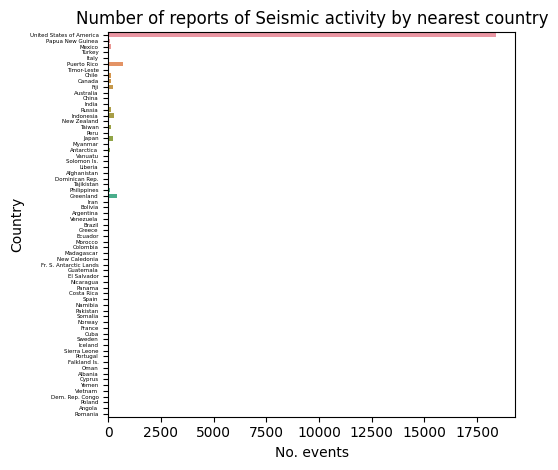

In [11]:
# Bar graph

bar_chart = sns.countplot(y = 'name',  data = earthq_final)
bar_chart.set(xlabel = 'No. events', ylabel = 'Country',title = "Number of reports of Seismic activity by nearest country")
plt.tight_layout()
plt.yticks(fontsize=4)
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/bar_graph.png')
plt.show()

/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_39045/3299969342.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  earthq_final.corr()
/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_39045/3299969342.py:4: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(earthq_final.corr(),annot=False)


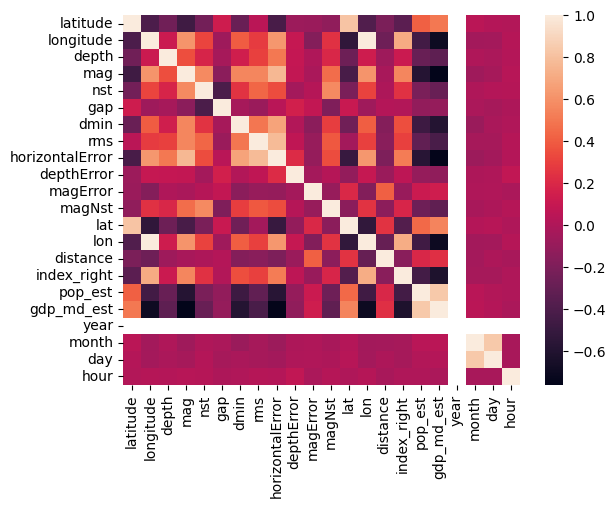

<Figure size 1000x500 with 0 Axes>

In [12]:
earthq_final.corr()

# could use seaborn heatmap to display this
sns.heatmap(earthq_final.corr(),annot=False)
plt.figure(figsize=(10,5))
plt.show()

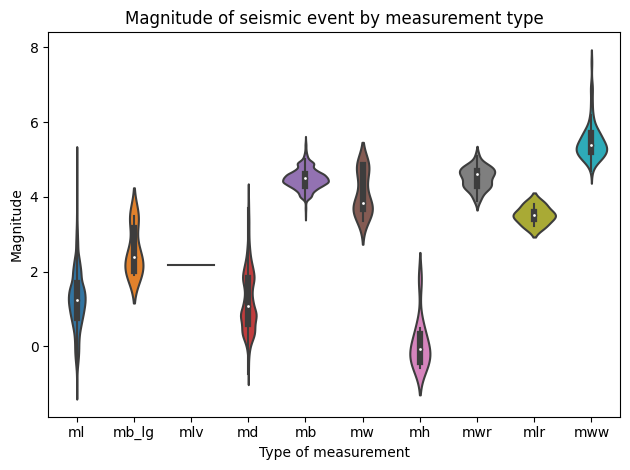

In [13]:
# Violin plot

violin_plot = sns.violinplot(x= 'magType', y = 'mag', data = earthq_final)
violin_plot.set(xlabel = 'Type of measurement', ylabel = 'Magnitude',title = "Magnitude of seismic event by measurement type")
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/violin_plot.png')
plt.show()

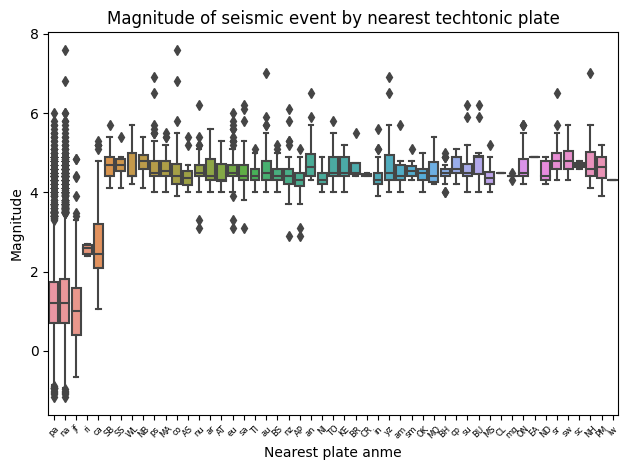

In [14]:
# Box plot
box_plot = sns.boxplot(x= 'plate', y = 'mag', data = earthq_final)
box_plot.set(xlabel = 'Nearest plate anme', ylabel = 'Magnitude',title = "Magnitude of seismic event by nearest techtonic plate")
plt.xticks(fontsize=6, rotation = 45)
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/box_plot.png')
plt.show()


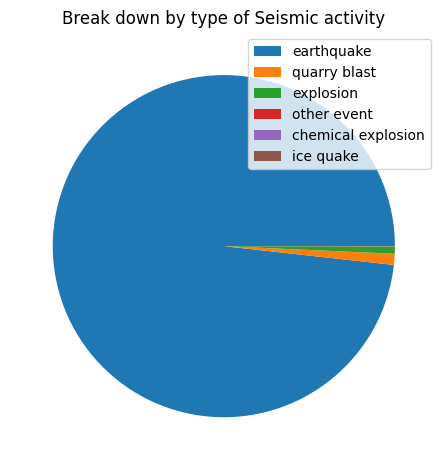

In [15]:
# Pie Chart.

type = pd.DataFrame(earthq_final['type'].value_counts())
type.reset_index(inplace=True)
fig, ax = plt.subplots()
type.plot(kind='pie',y='type',labels=None, ax=ax)
plt.title("Break down by type of Seismic activity")
plt.ylabel("")
plt.legend(loc='best', labels=type['index'])
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Pie_chart.png')
plt.show()



/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_39045/2933438502.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = pd.DataFrame(earthq_final.groupby(['day']).median())


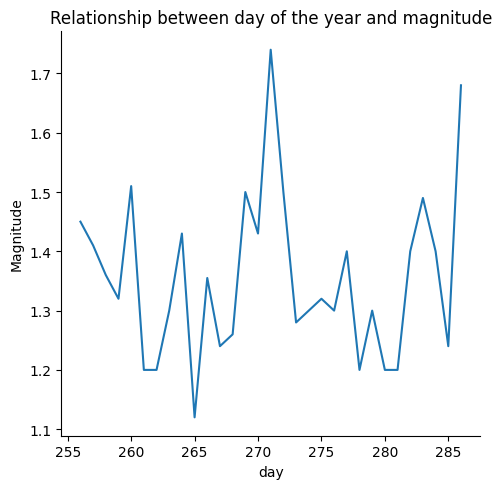

In [16]:
# Line Chart.

median = pd.DataFrame(earthq_final.groupby(['day']).median())

median


sns.relplot(data=median, x='day', y="mag", kind="line")


plt.title("Relationship between day of the year and magnitude")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Line_chart.png')
plt.show()


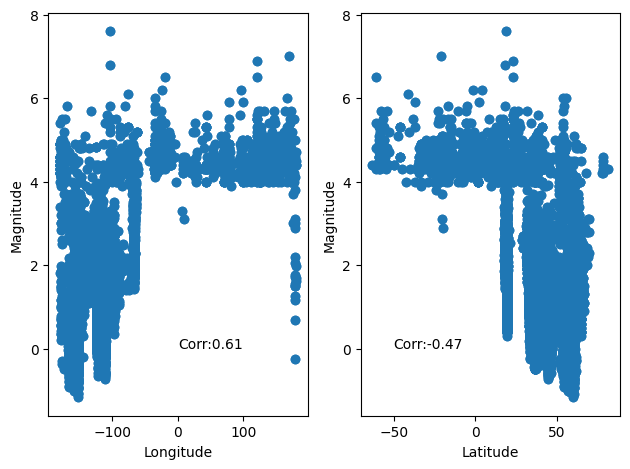

In [17]:
# Scatter Plot for magnitude and latitude and longitude
anot_1 = "Corr:" + str(earthq_final['mag'].corr(earthq_final['longitude']).round(2))
anot_2 = "Corr:" + str(earthq_final['mag'].corr(earthq_final['latitude']).round(2))
fig, ax = plt.subplots(1,2)

ax[0].scatter(earthq_final['longitude'],earthq_final['mag'])
ax[0].set_ylabel("Magnitude")
ax[0].set_xlabel("Longitude")
ax[0].text(0,0,anot_1,horizontalalignment='left', size='medium', color='black')
ax[1].scatter(earthq_final['latitude'],earthq_final['mag'])
#sns.relplot(data=earthq_final, x="mag", y="latitude", hue="magType")


ax[1].set_ylabel("Magnitude")
ax[1].set_xlabel("Latitude")
ax[1].text(-50,0,anot_2,horizontalalignment='left', size='medium', color='black')
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Scatter_chart.png')
plt.show()

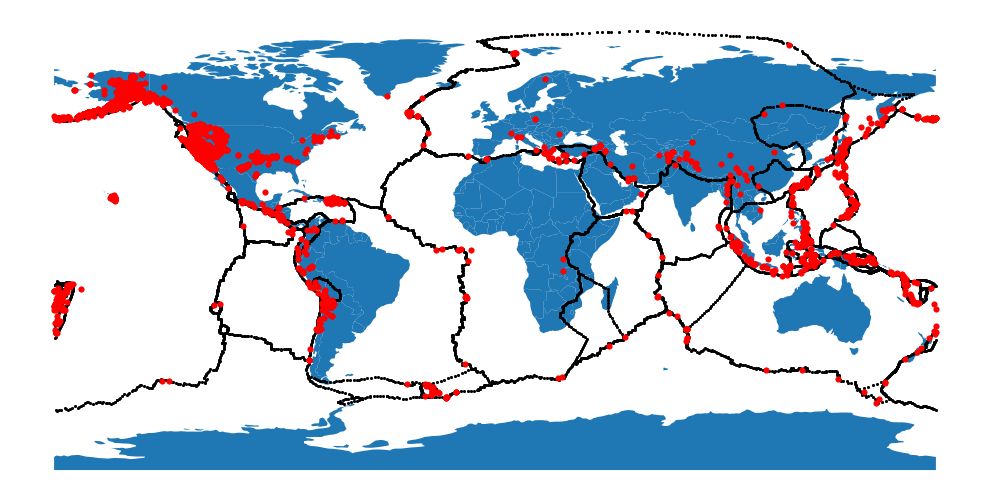

In [18]:
# Creating a map

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
world.plot(ax=ax)
tech_plate.plot(ax=ax, marker='o', color='black',markersize=1)
earthq_final.plot(ax=ax,marker='o', color='red',markersize=10)

# earthquake_geom.plot(ax=world.plot(figsize=(10,10)), marker='o', color='red',markersize=10)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/map_chart.png')

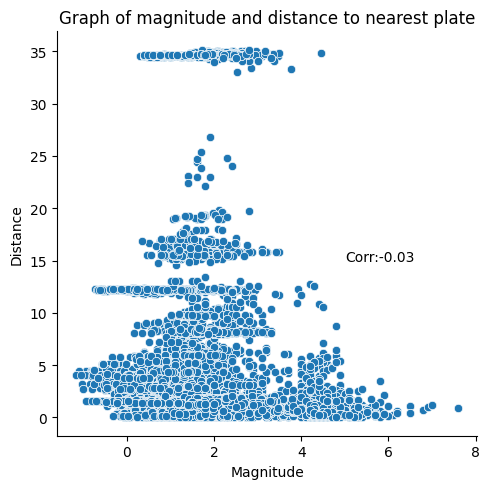

In [19]:
# Scatter Plot for depth and magnitude
anot_3 = "Corr:" + str(earthq_final['mag'].corr(earthq_final['distance']).round(2))
sns.relplot(data=earthq_final, x="mag", y="distance")

plt.title("Graph of magnitude and distance to nearest plate")
plt.ylabel("Distance")
plt.xlabel("Magnitude")
plt.text(5,15,anot_3,horizontalalignment='left', size='medium', color='black')
plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Scatter_chart_2.png')
plt.show()

In [20]:
import plotly.express as px

fig = px.scatter_geo(earthq_final,lat='latitude',lon='longitude', hover_name="place")
fig = px.scatter_geo(earthq_final,lat='latitude',lon='longitude', hover_name="place")
fig.update_layout(title = 'Significant Earthquakes', title_x=0.5)

plt.tight_layout()
plt.savefig('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/other_map.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [21]:
prs = Presentation('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/template.pptx')

# Slide 1 - title
slide = prs.slides.add_slide(prs.slide_layouts[0]) #slide_layout[0] is title slide in template selected
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Week 5 Presentation"
subtitle.text = "python-pptx was here!"

from pptx.util import Inches

# slide 2
img_path_1 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/bar_graph.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is an example of a bar chart"

left = Inches(2)
top = Inches(7)
height = Inches(3)
width = Inches(4)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows that most earthquakes are in the US"


left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_1, left, top)

# slide 3
img_path_2 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Line_chart.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is an example of a Line chart"

left = Inches(2)
top = Inches(7)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows that there is little relation between day and magnitude"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_2, left, top)

# slide 4
img_path_3 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/box_plot.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is an example of a boxplot"

left = Inches(2)
top = Inches(7)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows that earthquakes near a few plates tend to be smaller"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_3, left, top)

# slide 5
img_path_4 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/violin_plot.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is an example of a violin plot"

left = Inches(2)
top = Inches(7)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "Its pretty similar to a box plot, and shows that measurement type varies by magnitude"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_4, left, top)

# slide 6
img_path_5 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Scatter_chart.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is a scatter plot of latitude and longitude vs magnitude"

left = Inches(2)
top = Inches(7)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows a relationship with latitude, longitude and magnitude"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_5, left, top)

# slide 7
img_path_6 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Scatter_chart_2.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here we see a scatter graph"

left = Inches(2)
top = Inches(7)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows there is no relationship between earthquake magnitude and distance to a techtonic plate"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_6, left, top)

# slide 8
img_path_6 = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/map_chart.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is a map of techtonic plates"

left = Inches(2)
top = Inches(7)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows that activity is clustered around techtonic plates"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path_6, left, top)

# slide 9
img_path = '/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Graphs/Pie_chart.png'
slide = prs.slides.add_slide(prs.slide_layouts[5]) #slide_layout[5] is the 6th in the template selected

title = slide.shapes.title

title.text = "Here is an example of a pie chart"

left = Inches(2)
top = Inches(7)
height = Inches(3)
width = Inches(4)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = "It shows that most seismic activity is caused by earthquakes"

left = top = Inches(2)
pic = slide.shapes.add_picture(img_path, left, top)



prs.save('/Users/rebeccaharrison/Documents/Python/Bootcamp/Output/Week_5_presentation.pptx')